# Importar dados para iniciar análise

In [17]:
# importar pacotes necessários para essa análise:
import pandas as pd
import h2o

In [18]:
# Processo de importação dos dados
df_train = pd.read_csv('train.csv',delimiter=',')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Ver informações das colunas:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
# Ver quantidade de valores faltantes:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# Ver Estatísticas dos dados numéricos:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

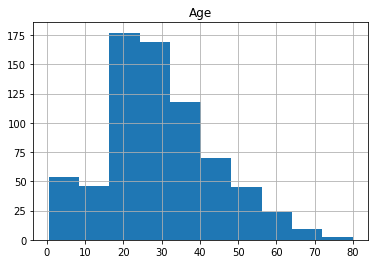

In [22]:
import matplotlib as plt 
# Verificação da distribuição da idade.
df_train[['Age']].hist()


In [23]:
# No caso da idade, os valores faltantes serão substituidos pela mediana.
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# As colunas cabin, Name, Ticket e PassengerId serão tiradas
df_train = df_train.drop(columns=['Cabin','Name','Ticket','PassengerId'])
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [25]:
# importar dataset de teste:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df_test = df_test.drop(columns=['Cabin','Name','Ticket','PassengerId'])
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [28]:
# A idade faltante será substituida pela mediana e o único fare com valor nulo será removido.
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test.dropna(inplace=True)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [29]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

# Iniciar treinamento do modelo:


In [30]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,23 hours 3 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_engme_tzkqkf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,295.4 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [31]:
from h2o.automl import H2OAutoML


In [32]:
df_train_h2o = h2o.H2OFrame(df_train)
df_train_h2o

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.25,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.925,S
1,1,female,35,1,0,53.1,S
0,3,male,35,0,0,8.05,S
0,3,male,28,0,0,8.4583,Q
0,1,male,54,0,0,51.8625,S
0,3,male,2,3,1,21.075,S
1,3,female,27,0,2,11.1333,S
1,2,female,14,1,0,30.0708,C


In [33]:
df_train_h2o['Survived'] = df_train_h2o['Survived'].asfactor()


In [34]:
modelo_automl = H2OAutoML(max_runtime_secs=260,
                          balance_classes=True)
modelo_automl.train(
    x = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
    y= 'Survived',
    training_frame= df_train_h2o
)

AutoML progress: |█
15:34:01.825: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_5_20220607_153401_model_20


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,32.0,32.0,17879.0,9.0,9.0,9.0,25.0,50.0,39.6875




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.09281703822285535
RMSE: 0.3046588883043712
LogLoss: 0.30816790664506705
Mean Per-Class Error: 0.1130057303923524
AUC: 0.9584579793386782
AUCPR: 0.9624245414491419
Gini: 0.9169159586773563

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23251881928631535: 


,,0,1,Error,Rate
0,0,469.0,80.0,0.1457,(80.0/549.0)
1,1,44.0,504.0,0.0803,(44.0/548.0)
2,Total,513.0,584.0,0.113,(124.0/1097.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.232519,0.890459,233.0
1,max f2,0.140942,0.920509,292.0
2,max f0point5,0.583760,0.917832,145.0
3,max accuracy,0.271865,0.888788,218.0
4,max precision,0.967406,1.000000,0.0
5,max recall,0.087610,1.000000,334.0
6,max specificity,0.967406,1.000000,0.0
7,max absolute_mcc,0.271865,0.777661,218.0
8,max min_per_class_accuracy,0.281925,0.883424,215.0
9,max mean_per_class_accuracy,0.271865,0.888794,218.0



Gains/Lift Table: Avg response rate: 49,95 %, avg score: 43,81 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010027,0.965813,2.001825,2.001825,1.000000,0.966757,1.000000,0.966757,0.020073,0.020073,100.182482,100.182482,0.020073
1,2,0.020055,0.962187,2.001825,2.001825,1.000000,0.964128,1.000000,0.965443,0.020073,0.040146,100.182482,100.182482,0.040146
2,3,0.030082,0.961568,2.001825,2.001825,1.000000,0.961956,1.000000,0.964281,0.020073,0.060219,100.182482,100.182482,0.060219
3,4,0.040109,0.960289,2.001825,2.001825,1.000000,0.961120,1.000000,0.963490,0.020073,0.080292,100.182482,100.182482,0.080292
4,5,0.050137,0.957300,2.001825,2.001825,1.000000,0.959003,1.000000,0.962593,0.020073,0.100365,100.182482,100.182482,0.100365
5,6,0.101185,0.944646,2.001825,2.001825,1.000000,0.951798,1.000000,0.957147,0.102190,0.202555,100.182482,100.182482,0.202555
6,7,0.151322,0.933988,2.001825,2.001825,1.000000,0.938996,1.000000,0.951133,0.100365,0.302920,100.182482,100.182482,0.302920
7,8,0.200547,0.906501,2.001825,2.001825,1.000000,0.923494,1.000000,0.944349,0.098540,0.401460,100.182482,100.182482,0.401460
8,9,0.300820,0.762615,1.929031,1.977560,0.963636,0.827466,0.987879,0.905388,0.193431,0.594891,92.903119,97.756027,0.587605
9,10,0.400182,0.580323,1.763075,1.924305,0.880734,0.673949,0.961276,0.847924,0.175182,0.770073,76.307507,92.430541,0.739108




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.12613630920397076
RMSE: 0.35515673892518324
LogLoss: 0.4097328637684216
Mean Per-Class Error: 0.18157415396414534
AUC: 0.8716033404701797
AUCPR: 0.8566176085342285
Gini: 0.7432066809403595

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35926215793555527: 


,,0,1,Error,Rate
0,0,462.0,87.0,0.1585,(87.0/549.0)
1,1,70.0,272.0,0.2047,(70.0/342.0)
2,Total,532.0,359.0,0.1762,(157.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.359262,0.776034,208.0
1,max f2,0.240387,0.809071,245.0
2,max f0point5,0.672505,0.825434,121.0
3,max accuracy,0.579983,0.832772,145.0
4,max precision,0.984471,1.000000,0.0
5,max recall,0.028816,1.000000,394.0
6,max specificity,0.984471,1.000000,0.0
7,max absolute_mcc,0.579983,0.642832,145.0
8,max min_per_class_accuracy,0.319613,0.809942,221.0
9,max mean_per_class_accuracy,0.359262,0.818426,208.0



Gains/Lift Table: Avg response rate: 38,38 %, avg score: 37,17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.970783,2.605263,2.605263,1.000000,0.977739,1.000000,0.977739,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,0.960925,2.605263,2.605263,1.000000,0.966335,1.000000,0.972037,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.030303,0.952911,2.605263,2.605263,1.000000,0.956239,1.000000,0.966771,0.026316,0.078947,160.526316,160.526316,0.078947
3,4,0.040404,0.947221,2.605263,2.605263,1.000000,0.950854,1.000000,0.962792,0.026316,0.105263,160.526316,160.526316,0.105263
4,5,0.050505,0.944802,2.605263,2.605263,1.000000,0.946111,1.000000,0.959456,0.026316,0.131579,160.526316,160.526316,0.131579
5,6,0.101010,0.914622,2.547368,2.576316,0.977778,0.930323,0.988889,0.944889,0.128655,0.260234,154.736842,157.631579,0.258412
6,7,0.150393,0.875638,2.368421,2.508052,0.909091,0.893337,0.962687,0.927962,0.116959,0.377193,136.842105,150.805185,0.368086
7,8,0.200898,0.777683,2.200000,2.430609,0.844444,0.829587,0.932961,0.903231,0.111111,0.488304,120.000000,143.060864,0.466446
8,9,0.300786,0.559061,1.814902,2.226139,0.696629,0.683248,0.854478,0.830177,0.181287,0.669591,81.490242,122.613904,0.598552
9,10,0.400673,0.360288,1.229450,1.977665,0.471910,0.452126,0.759104,0.735929,0.122807,0.792398,22.945003,97.766475,0.635749




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.838353,0.048336,0.865922,0.870787,0.764045,0.876405,0.814607
1,auc,0.862353,0.045234,0.894740,0.875473,0.789037,0.900768,0.851748
2,err,0.161647,0.048336,0.134078,0.129213,0.235955,0.123596,0.185393
3,err_count,28.800000,8.584870,24.000000,23.000000,42.000000,22.000000,33.000000
4,f0point5,0.799363,0.075802,0.844156,0.866261,0.681818,0.838816,0.765766
5,f1,0.788551,0.048522,0.812500,0.832117,0.720000,0.822581,0.755556
6,f2,0.779796,0.025693,0.783133,0.800562,0.762712,0.806962,0.745614
7,lift_top_group,2.609863,0.122743,2.632353,2.438356,2.617647,2.781250,2.579710
8,logloss,0.422568,0.075672,0.374039,0.399117,0.542401,0.351234,0.446050
9,max_per_class_error,0.234602,0.024067,0.235294,0.219178,0.254545,0.203125,0.260870



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-06-07 15:34:29,12.580 sec,0.0,0.513213,0.720674,0.500000,0.499544,1.000000,0.500456
1,,2022-06-07 15:34:30,12.596 sec,5.0,0.421967,0.540481,0.926145,0.935321,2.001825,0.148587
2,,2022-06-07 15:34:30,12.610 sec,10.0,0.372094,0.448679,0.934247,0.942135,2.001825,0.132179
3,,2022-06-07 15:34:30,12.624 sec,15.0,0.341805,0.390817,0.942068,0.948886,2.001825,0.128532
4,,2022-06-07 15:34:30,12.644 sec,20.0,0.328606,0.360899,0.944805,0.951182,2.001825,0.122151
5,,2022-06-07 15:34:30,12.665 sec,25.0,0.316120,0.333150,0.952043,0.956818,2.001825,0.129444
6,,2022-06-07 15:34:30,12.716 sec,30.0,0.308384,0.315551,0.956376,0.960791,2.001825,0.113947
7,,2022-06-07 15:34:30,12.731 sec,32.0,0.304659,0.308168,0.958458,0.962425,2.001825,0.113036



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Sex,430.599213,1.000000,0.491968
1,Age,168.535477,0.391398,0.192555
2,Fare,140.560394,0.326430,0.160593
3,Pclass,69.194107,0.160693,0.079056
4,Embarked,31.484871,0.073119,0.035972
5,SibSp,27.469530,0.063794,0.031385
6,Parch,7.414190,0.017218,0.008471


In [35]:
best_model = modelo_automl.get_best_model()
best_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_5_20220607_153401_model_20


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,32.0,32.0,17879.0,9.0,9.0,9.0,25.0,50.0,39.6875




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.09281703822285535
RMSE: 0.3046588883043712
LogLoss: 0.30816790664506705
Mean Per-Class Error: 0.1130057303923524
AUC: 0.9584579793386782
AUCPR: 0.9624245414491419
Gini: 0.9169159586773563

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23251881928631535: 


,,0,1,Error,Rate
0,0,469.0,80.0,0.1457,(80.0/549.0)
1,1,44.0,504.0,0.0803,(44.0/548.0)
2,Total,513.0,584.0,0.113,(124.0/1097.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.232519,0.890459,233.0
1,max f2,0.140942,0.920509,292.0
2,max f0point5,0.583760,0.917832,145.0
3,max accuracy,0.271865,0.888788,218.0
4,max precision,0.967406,1.000000,0.0
5,max recall,0.087610,1.000000,334.0
6,max specificity,0.967406,1.000000,0.0
7,max absolute_mcc,0.271865,0.777661,218.0
8,max min_per_class_accuracy,0.281925,0.883424,215.0
9,max mean_per_class_accuracy,0.271865,0.888794,218.0



Gains/Lift Table: Avg response rate: 49,95 %, avg score: 43,81 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010027,0.965813,2.001825,2.001825,1.000000,0.966757,1.000000,0.966757,0.020073,0.020073,100.182482,100.182482,0.020073
1,2,0.020055,0.962187,2.001825,2.001825,1.000000,0.964128,1.000000,0.965443,0.020073,0.040146,100.182482,100.182482,0.040146
2,3,0.030082,0.961568,2.001825,2.001825,1.000000,0.961956,1.000000,0.964281,0.020073,0.060219,100.182482,100.182482,0.060219
3,4,0.040109,0.960289,2.001825,2.001825,1.000000,0.961120,1.000000,0.963490,0.020073,0.080292,100.182482,100.182482,0.080292
4,5,0.050137,0.957300,2.001825,2.001825,1.000000,0.959003,1.000000,0.962593,0.020073,0.100365,100.182482,100.182482,0.100365
5,6,0.101185,0.944646,2.001825,2.001825,1.000000,0.951798,1.000000,0.957147,0.102190,0.202555,100.182482,100.182482,0.202555
6,7,0.151322,0.933988,2.001825,2.001825,1.000000,0.938996,1.000000,0.951133,0.100365,0.302920,100.182482,100.182482,0.302920
7,8,0.200547,0.906501,2.001825,2.001825,1.000000,0.923494,1.000000,0.944349,0.098540,0.401460,100.182482,100.182482,0.401460
8,9,0.300820,0.762615,1.929031,1.977560,0.963636,0.827466,0.987879,0.905388,0.193431,0.594891,92.903119,97.756027,0.587605
9,10,0.400182,0.580323,1.763075,1.924305,0.880734,0.673949,0.961276,0.847924,0.175182,0.770073,76.307507,92.430541,0.739108




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.12613630920397076
RMSE: 0.35515673892518324
LogLoss: 0.4097328637684216
Mean Per-Class Error: 0.18157415396414534
AUC: 0.8716033404701797
AUCPR: 0.8566176085342285
Gini: 0.7432066809403595

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35926215793555527: 


,,0,1,Error,Rate
0,0,462.0,87.0,0.1585,(87.0/549.0)
1,1,70.0,272.0,0.2047,(70.0/342.0)
2,Total,532.0,359.0,0.1762,(157.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.359262,0.776034,208.0
1,max f2,0.240387,0.809071,245.0
2,max f0point5,0.672505,0.825434,121.0
3,max accuracy,0.579983,0.832772,145.0
4,max precision,0.984471,1.000000,0.0
5,max recall,0.028816,1.000000,394.0
6,max specificity,0.984471,1.000000,0.0
7,max absolute_mcc,0.579983,0.642832,145.0
8,max min_per_class_accuracy,0.319613,0.809942,221.0
9,max mean_per_class_accuracy,0.359262,0.818426,208.0



Gains/Lift Table: Avg response rate: 38,38 %, avg score: 37,17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.970783,2.605263,2.605263,1.000000,0.977739,1.000000,0.977739,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,0.960925,2.605263,2.605263,1.000000,0.966335,1.000000,0.972037,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.030303,0.952911,2.605263,2.605263,1.000000,0.956239,1.000000,0.966771,0.026316,0.078947,160.526316,160.526316,0.078947
3,4,0.040404,0.947221,2.605263,2.605263,1.000000,0.950854,1.000000,0.962792,0.026316,0.105263,160.526316,160.526316,0.105263
4,5,0.050505,0.944802,2.605263,2.605263,1.000000,0.946111,1.000000,0.959456,0.026316,0.131579,160.526316,160.526316,0.131579
5,6,0.101010,0.914622,2.547368,2.576316,0.977778,0.930323,0.988889,0.944889,0.128655,0.260234,154.736842,157.631579,0.258412
6,7,0.150393,0.875638,2.368421,2.508052,0.909091,0.893337,0.962687,0.927962,0.116959,0.377193,136.842105,150.805185,0.368086
7,8,0.200898,0.777683,2.200000,2.430609,0.844444,0.829587,0.932961,0.903231,0.111111,0.488304,120.000000,143.060864,0.466446
8,9,0.300786,0.559061,1.814902,2.226139,0.696629,0.683248,0.854478,0.830177,0.181287,0.669591,81.490242,122.613904,0.598552
9,10,0.400673,0.360288,1.229450,1.977665,0.471910,0.452126,0.759104,0.735929,0.122807,0.792398,22.945003,97.766475,0.635749




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.838353,0.048336,0.865922,0.870787,0.764045,0.876405,0.814607
1,auc,0.862353,0.045234,0.894740,0.875473,0.789037,0.900768,0.851748
2,err,0.161647,0.048336,0.134078,0.129213,0.235955,0.123596,0.185393
3,err_count,28.800000,8.584870,24.000000,23.000000,42.000000,22.000000,33.000000
4,f0point5,0.799363,0.075802,0.844156,0.866261,0.681818,0.838816,0.765766
5,f1,0.788551,0.048522,0.812500,0.832117,0.720000,0.822581,0.755556
6,f2,0.779796,0.025693,0.783133,0.800562,0.762712,0.806962,0.745614
7,lift_top_group,2.609863,0.122743,2.632353,2.438356,2.617647,2.781250,2.579710
8,logloss,0.422568,0.075672,0.374039,0.399117,0.542401,0.351234,0.446050
9,max_per_class_error,0.234602,0.024067,0.235294,0.219178,0.254545,0.203125,0.260870



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-06-07 15:34:29,12.580 sec,0.0,0.513213,0.720674,0.500000,0.499544,1.000000,0.500456
1,,2022-06-07 15:34:30,12.596 sec,5.0,0.421967,0.540481,0.926145,0.935321,2.001825,0.148587
2,,2022-06-07 15:34:30,12.610 sec,10.0,0.372094,0.448679,0.934247,0.942135,2.001825,0.132179
3,,2022-06-07 15:34:30,12.624 sec,15.0,0.341805,0.390817,0.942068,0.948886,2.001825,0.128532
4,,2022-06-07 15:34:30,12.644 sec,20.0,0.328606,0.360899,0.944805,0.951182,2.001825,0.122151
5,,2022-06-07 15:34:30,12.665 sec,25.0,0.316120,0.333150,0.952043,0.956818,2.001825,0.129444
6,,2022-06-07 15:34:30,12.716 sec,30.0,0.308384,0.315551,0.956376,0.960791,2.001825,0.113947
7,,2022-06-07 15:34:30,12.731 sec,32.0,0.304659,0.308168,0.958458,0.962425,2.001825,0.113036



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Sex,430.599213,1.000000,0.491968
1,Age,168.535477,0.391398,0.192555
2,Fare,140.560394,0.326430,0.160593
3,Pclass,69.194107,0.160693,0.079056
4,Embarked,31.484871,0.073119,0.035972
5,SibSp,27.469530,0.063794,0.031385
6,Parch,7.414190,0.017218,0.008471


In [39]:
best_model.download_model()

'c:\\Users\\engme\\OneDrive\\Área de Trabalho\\Arquivos\\Portfolio\\API-titanic\\GBM_grid_1_AutoML_5_20220607_153401_model_20'

In [37]:
df = pd.DataFrame([
        1,
        'male',
        28,
        1,
        2,
        1,
        'S'
    ]).transpose()
df.columns = [
        'Pclass',
        'Sex',
        'Age',
        'SibSp',
        'Parch',
        'Fare',
        'Embarked'
    ]
imp = h2o.H2OFrame(df)
y = best_model.predict(imp)
y['p0']

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


p0
0.906622


In [38]:
int(y['predict'])

KeyboardInterrupt: 